<a href="https://colab.research.google.com/github/burakerdgn/Lecture_Notes/blob/main/OpenCV_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect to Google Drive**

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive


fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [ ]:
cd drive/Colab_workspace/Open_CV

/content/drive/Colab_workspace/Open_CV


# **NumPy Lesson**

In [ ]:
import numpy as np

In [ ]:
mylist = [1,2,3]
type(mylist)

In [ ]:
myarray = np.array(mylist)
type(myarray)

In [ ]:
np.arange(0,10,2)  # Arange function, build an array from starting point to decided point. You can decide step size with the third element

In [ ]:
np.zeros(shape=(10,5)) # istenilen dimension da 0 larla dolu array yaratir

In [ ]:
np.ones(shape=(2,4))

In [ ]:
np.random.seed(101)
arr = np.random.randint(0,100,10) # Create random array

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40])

In [ ]:
arr.shape

(10,)

In [ ]:
mat = np.arange(0,100).reshape(10,10)
mat[1,:]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
mat[0:3,0:5] # 3x5 matrix secme

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# **OpenCV**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('9381.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(288, 338, 3)

In [ ]:
fix_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # opencv resimleri blue green red olarak alir. matplot'da dogru goruntulemek icin bgr -> rgb donusumu yapilir

In [ ]:
from google.colab.patches import cv2_imshow

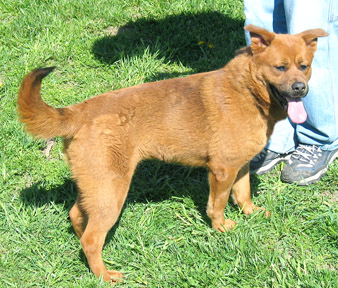

In [ ]:
cv2_imshow(img)

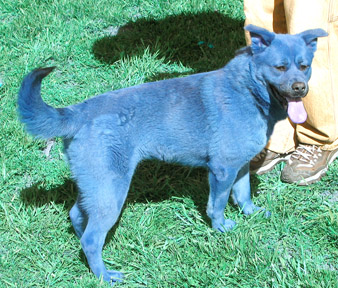

In [ ]:
cv2_imshow(fix_img)

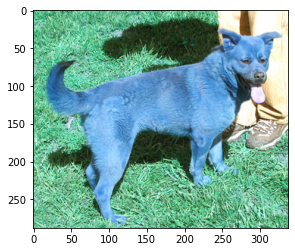

In [ ]:
plt.imshow(img)

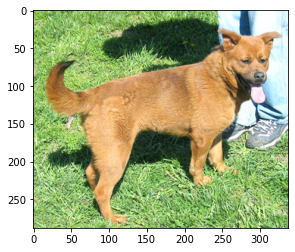

In [ ]:
plt.imshow(fix_img)

## **Draw with mouse**

cv2.imshow function u colab uzerinde calismadigi icin, mouse ile cizme ornegi yapilmiyor

In [ ]:
def draw_circle(event,x,y,flags,param):
  pass

cv2.namedWindow(winname='abc')
cv2.setMouseCallback('abc',draw_circle)


In [ ]:
img2 = np.zeros((512,512,3),np.int8)
cv2_imshow(img2)

# **Image Processing with OpenCV**

* Normalde biz RGB model image modelleme kullaniyoruz ama bir de **HSL ve HSV Cylinder Model** var
* **HSL Cylinder Model** = Hue,Saturation, Lightness
* **HSV Cylinder Model** = Hue,Saturation, Value

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('9381.jpg')

In [ ]:
type(img)

NoneType

In [ ]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

### **Blended Images** = cv2.addweighted function u ile iki resmi ust uste ekliyoruz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img_dog = cv2.imread('dog.jpg')

In [ ]:
img_dog = cv2.cvtColor(img_dog,cv2.COLOR_BGR2RGB)

In [ ]:
img_Cat = cv2.imread('cat.jpg')

In [ ]:
img_Cat = cv2.cvtColor(img_Cat,cv2.COLOR_BGR2RGB)

In [ ]:
img_dog.shape

(288, 338, 3)

In [ ]:
img_Cat.shape

(354, 500, 3)

In [ ]:
img_dog = cv2.resize(img_dog,(500,354))

In [ ]:
img_dog.shape

(354, 500, 3)

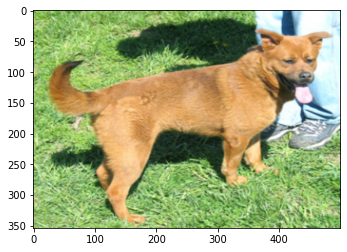

In [ ]:
plt.imshow(img_dog)

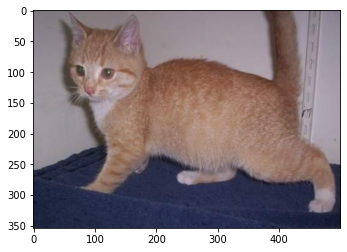

In [ ]:
plt.imshow(img_Cat)

In [ ]:
blended_img = cv2.addWeighted(src1=img_dog,alpha=0.2,src2=img_Cat,beta=0.5,gamma=5)

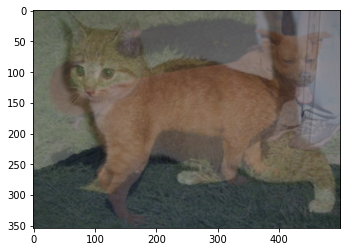

In [ ]:
plt.imshow(blended_img)

In [ ]:
img_dog_gray = cv2.cvtColor(img_dog,cv2.COLOR_RGB2GRAY) 

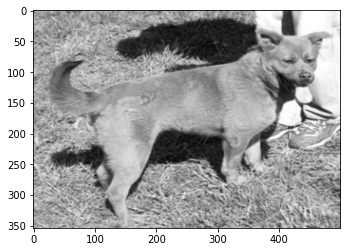

In [ ]:
plt.imshow(img_dog_gray,cmap='gray')

In [ ]:
mask_inv = cv2.bitwise_not(img_dog_gray)  # arraydaki bütün degerleri not fonksiyonu ile carpti -> siyah bitler beyaza beyaz bitler siyaha donustu

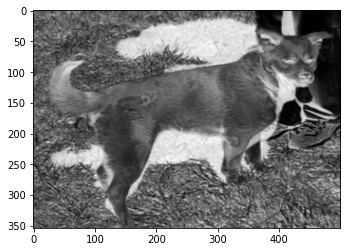

In [ ]:
plt.imshow(mask_inv,cmap='gray')

### **Image Thresholding**

### **Blurring and Smoothing**

* **Blurring** = Edge detection bulmakta yardimci olur

* **Kernel** = 3x3 veya daha degisik boyutlardaki matrixlerdir. Image uzerinde gezdirilen bu matrix ,kernel icindenki matrix elemanlarinin image uzerindeki matrix elemanlariyla tek tek carpilarak edge detection , blurlama gibi islemlerin yapilmasina olanak saglar.
  * Aciklayici ornek icin https://setosa.io/ev/image-kernels/ sayfasina bak

* **Morphological Operators** = Spesifik kerneller.
  * Bu siteden incelenebilir https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [ ]:
def load_img():
  blank_img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=30)
  return blank_img

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [ ]:
img = load_img()
display_img(img)

In [ ]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
result = cv2.erode(img,kernel,iterations=5) # EROSION = shrink image regions

In [ ]:
display_img(result)

In [ ]:
img = load_img()

In [ ]:
white_noise = np.random.randint(low=0,high=2,size=(600,600)) # noise image yaratiyoruz
white_noise

In [ ]:
display_img(white_noise)

In [ ]:
white_noise = white_noise * 255

In [ ]:
noise_img = white_noise + img

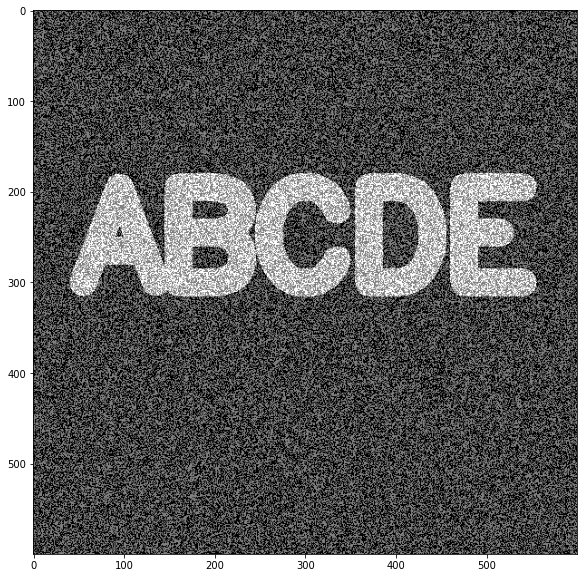

In [ ]:
display_img(noise_img)

In [ ]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)  # backgrounddaki gurultuyu siliyor

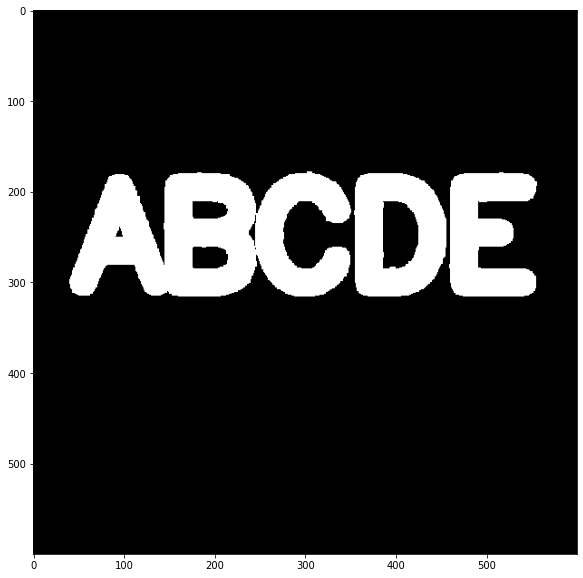

In [ ]:
display_img(opening)

In [ ]:
img = load_img()

In [ ]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

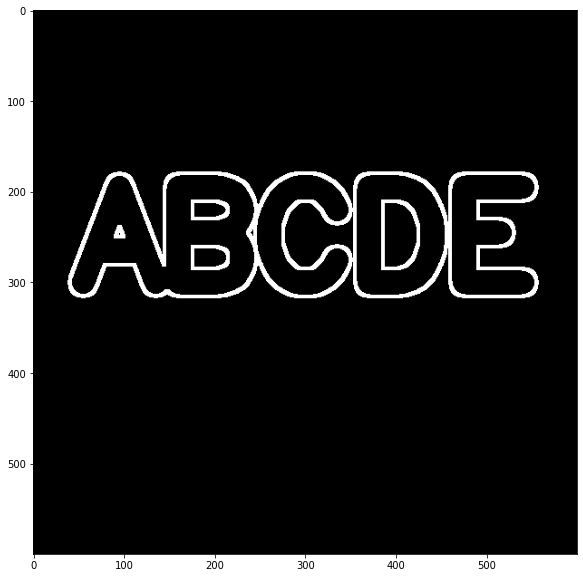

In [ ]:
display_img(gradient)

### **Gradient**

* **Image Gradient** = An image gradient is a directional change in the intensity or color in an image
  * **Sobel-Feldman Operator** = Yatay ve dikey cizgileri belirlemek icin kullanilan yontem. x ve y gradientler ile yatay ve dikey cizgiler ayri ayri belirlenir, daha sonra normalized gradient ile edge detection elde edilir.

### **Histogram**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('dog.jpg') # Original BGR  OpenCV
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Converted to rgb in order to show it with matplot

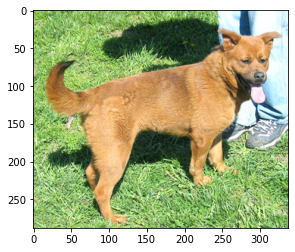

In [ ]:
plt.imshow(img)

In [ ]:
# OpenCV image deminsions are BGR not RGB
hist_values_blue = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values_green = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_values_red = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

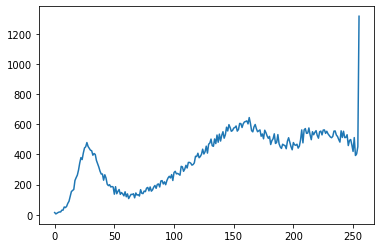

In [ ]:
plt.plot(hist_values_blue) # histagram of blue channel at the image

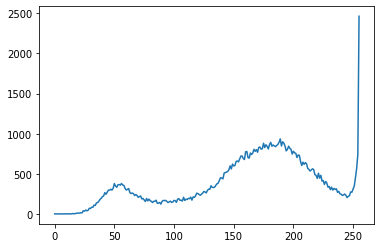

In [ ]:
plt.plot(hist_values_green)

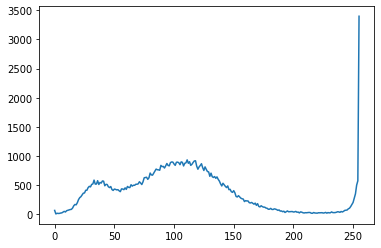

In [ ]:
plt.plot(hist_values_red)

Text(0.5, 1.0, 'HISTOGRAM FOR THE IMAGE')

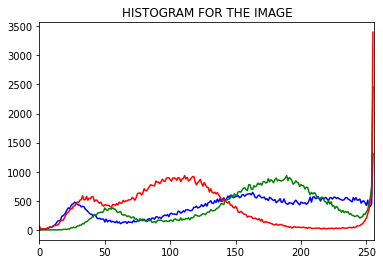

In [ ]:
color = ('b','g','r')

for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,256])

plt.title('HISTOGRAM FOR THE IMAGE')

# **Video Basics with OpenCV**

Google Colabda video oynatamadigimiz icin bu bolum tamamlanamadi!!!!!!!

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow googlecolab da calismiyo

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('traffic.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:

# Create a function based on a CV2 Event (let button click)

# mouse callback function
def draw_circle(event,x,y,flags,param):
  global center,clicked

  # get mouse click on down and track center
  if event == cv2.EVENT_LBUTTONDOWN:
    center = (x,y)

  if event == cv2.EVENT_LBUTTONUP:
    clicked = True

# Haven't drawn anything yet!
center = (0,0)
clicked = False

# Capture Video
cap = cv2.VideoCapture('traffic.mp4')

if cap.isOpened() == False:
  print('Error')

while cap.isOpened():

  ret,frame = cap.read()

  if ret == True:

    cv2_imshow(frame)



# **Object Detection with OpenCV**

### **Template Matching**


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(full)

In [ ]:
face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)


In [ ]:
plt.imshow(face)

In [ ]:
height, width,channels = face.shape

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (y,x) 
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121) # give me one row 2 columns and grap the first pic
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

### **Corner Detection**

* **Harris Corner Detection** = Resim üzerinde her yone dogru major bir change olup olmadigini kontrol ediyo

  **cornerHarris Function**

  *  src Input single-channel 8-bit or floating-point image.
  *  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
  *  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
  *  ksize Aperture parameter for the Sobel operator.
  *  k Harris detector free parameter. See the formula in DocString
  *  borderType Pixel extrapolation method. See #BorderTypes.
  

* **Shi-Tomasi** = Harris'in modifiye edilmis hali. It changes scoring function selection criteria

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

In [ ]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

In [ ]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

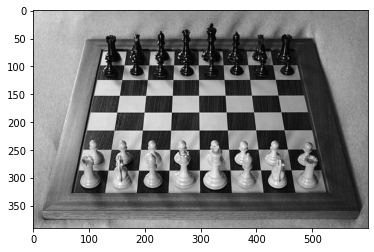

In [ ]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

**Harris Corner**

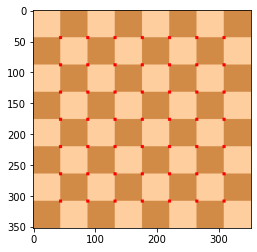

In [ ]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.  
flat_chess[dst>0.01*dst.max()]=[255,0,0] # Bu kod sadece kornerlari kirmizi nokta halinde gostermek icin, bu islemi yapmak icin cv2.dilate kullaniliyor

plt.imshow(flat_chess)

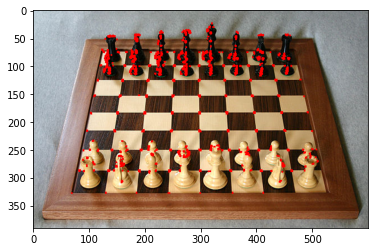

In [ ]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

**Shi-Thomasi**

In [ ]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

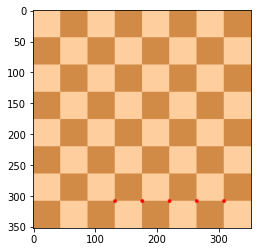

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

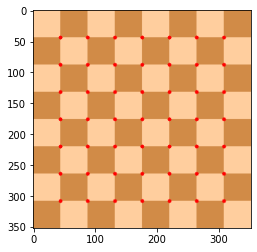

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

In [ ]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

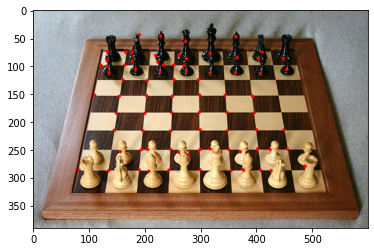

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

### **Edge Detection**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

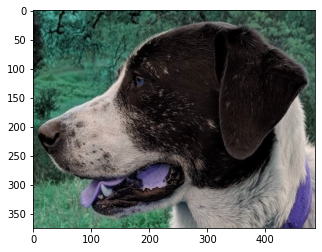

In [ ]:
img = cv2.imread('sammy_face.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

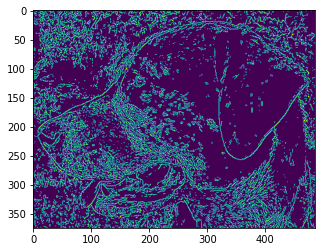

In [ ]:
edges = cv2.Canny(image=img,threshold1=127,threshold2=127)
plt.imshow(edges)

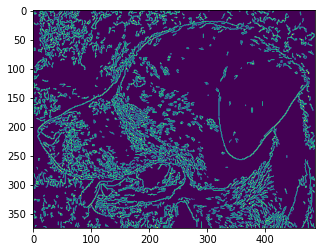

In [ ]:
edges = cv2.Canny(image=img,threshold1=200,threshold2=127)
plt.imshow(edges)

**Chosing Threshold**

In [ ]:
# Calculate the median pixel value
med_val = np.median(img) 
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

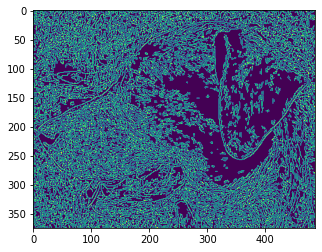

In [ ]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

lets try it by blurring the image first

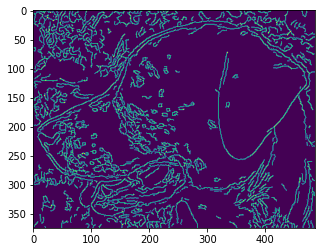

In [ ]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

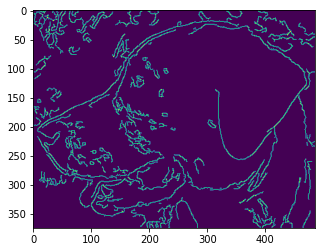

In [ ]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

### **Grid Detection**

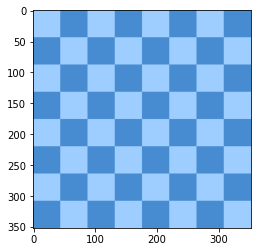

In [ ]:
flat_chess = cv2.imread('flat_chessboard.png')
plt.imshow(flat_chess,cmap='gray')

In [ ]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


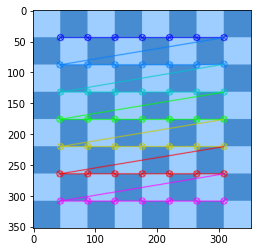

In [ ]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (7, 7), corners, found)
plt.imshow(flat_chess_copy)

**Circle Based Grids**

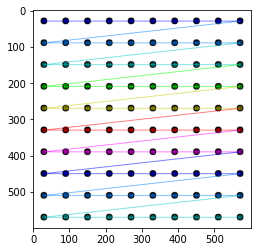

In [ ]:
dots = cv2.imread('dot_grid.png')
#plt.imshow(dots)
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
dbg_image_circles = dots.copy()
cv2.drawChessboardCorners(dbg_image_circles, (10, 10), corners, found)
plt.imshow(dbg_image_circles)

### **Countour Detection**

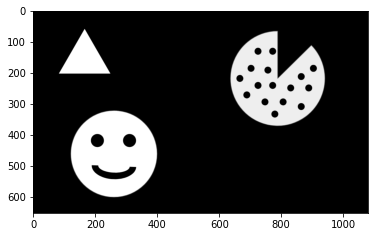

In [ ]:
img = cv2.imread('internal_external.png',0)
plt.imshow(img,cmap='gray')

In [ ]:
img.shape

(652, 1080)

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [ ]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

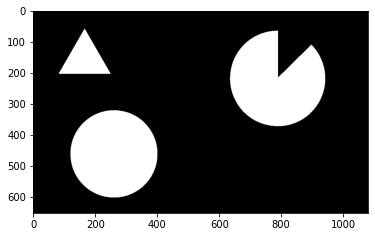

In [ ]:
plt.imshow(external_contours,cmap='gray')

In [ ]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

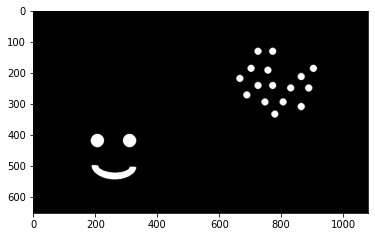

In [ ]:
plt.imshow(image_internal,cmap='gray')

### **Feature Matching**